In [3]:
# Spatial Synapses Case Study
# W Gray Roncal and JM Matelsky

import csv
import numpy as np
import pylab as plt
import scipy.stats
%matplotlib inline

# read in data
data = open('/Users/gkiar/code/ocp/ndpaper/spatialsynapses/synapse_blocks_merged_06192016.csv','r').readlines()
fieldnames = ['xstart', 'ystart', 'zstart', 'xstop', 'ystop', 'zstop', 'res', 'total_pix', 
              'mask_core_pix', 'mask_fraction', 'syn_count', 'density', 'syn_count_unmasked']
reader = csv.reader(data)
reader.next()

rows = [[(float(col)) for col in row] for row in reader]


In [4]:
'''
To generate this data, we first run a version of vesicle (docs.neurodata.io/vesicle), an algorithm achieving 
state of the art performance while 

In this analysis, we make two preprocessing decisions with respect to our data, to improve robustness:
- We remove blocks that are more than 50% masked.  This reduces the chance of incorporating unrealistic density estimates
- We remove values > 3 std from the mean, Here we make two simplifications to our data: 

'''
syn_mtx = np.asarray(rows)
syn_mtx_valid = syn_mtx[syn_mtx[:,9]<0.5,:]

print 1.0*len(syn_mtx_valid)/len(syn_mtx) # percentage of blocks used

0.546700454203


In [5]:
s = syn_mtx_valid[:,11]
s_mean = np.mean(s)
s_std = np.std(s)
s1 = s[(s >= s_mean - 1*s_std) & (s <= s_mean + 1*s_std)]
s2 = s[(s >= s_mean - 2*s_std) & (s <= s_mean + 2*s_std)]
s3 = s[(s >= s_mean - 3*s_std) & (s <= s_mean + 3*s_std)]

print len(s2)

freq, edges = np.histogram(s2,10)

chisq, p_val = scipy.stats.chisquare(freq, f_exp = None, ddof=0, axis=0) 
#[500, 1800, 4800, 9200, 13600, 15200, 10200, 4700, 1500, 300]
print freq
print edges
print chisq
print('%.10f' % p_val)




59443
[ 1982  3680  5683  7624  9652 10363  8947  6076  3578  1858]
[ 0.697   0.8895  1.082   1.2745  1.467   1.6595  1.852   2.0445  2.237
  2.4295  2.622 ]
14857.8083374
0.0000000000


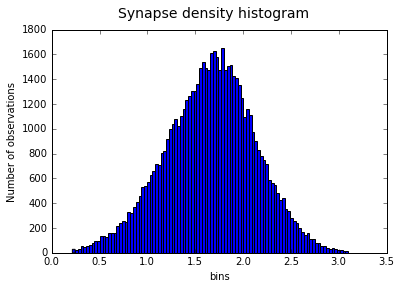

In [6]:
#plt.hist(freq)
plt.hist(s3, 100)
plt.xlabel("bins")
plt.ylabel("Number of observations")
plt.suptitle("Synapse density histogram", fontsize="14")

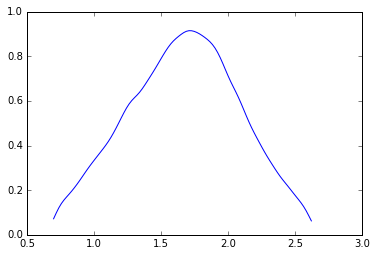

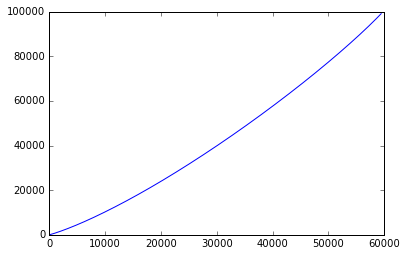

In [7]:
from scipy.stats.kde import gaussian_kde
data = s2
# this create the kernel, given an array it will estimate the probability over that values
kde = gaussian_kde( data )
# these are the values over wich your kernel will be evaluated
dist_space = np.linspace( min(data), max(data), 100 )
# plot the results
plt.plot( dist_space, kde(dist_space) )
plt.show()
sorted_data = np.sort(data)
cumulative = np.cumsum(sorted_data)

plt.plot(cumulative)
plt.show()


In [8]:
# This is with all raw data
freq, edges = np.histogram(syn_mtx_valid[:,11],100)

chisq, p_val = scipy.stats.chisquare(freq, f_exp=None, ddof=0, axis=0)

print freq
print edges
print chisq
print p_val

[   6   16   22   48   59   96  119  173  222  263  291  368  456  543  677
  800 1014 1138 1276 1393 1630 1908 2100 2064 2330 2476 2639 2944 2932 3068
 3107 2968 2954 2779 2543 2283 2098 1827 1504 1335 1140  958  828  669  523
  419  307  266  197  133  102   70   56   36   24   32   16   13   18    5
    6   10    4    8    3    2    3    2    3    1    4    6    3    0    1
    2    0    0    1    1    1    1    3    0    0    1    0    0    1    0
    0    0    0    0    0    0    0    0    0    1]
[ 0.026    0.08214  0.13828  0.19442  0.25056  0.3067   0.36284  0.41898
  0.47512  0.53126  0.5874   0.64354  0.69968  0.75582  0.81196  0.8681
  0.92424  0.98038  1.03652  1.09266  1.1488   1.20494  1.26108  1.31722
  1.37336  1.4295   1.48564  1.54178  1.59792  1.65406  1.7102   1.76634
  1.82248  1.87862  1.93476  1.9909   2.04704  2.10318  2.15932  2.21546
  2.2716   2.32774  2.38388  2.44002  2.49616  2.5523   2.60844  2.66458
  2.72072  2.77686  2.833    2.88914  2.94528  3.00142 

In [9]:
# This is with masking excluded, but no outlier removed
freq, edges = np.histogram(syn_mtx[:,11],100)

import scipy.stats

chisq, p_val = scipy.stats.chisquare(freq, f_exp=None, ddof=0, axis=0)

print freq
print edges
print chisq
print p_val

[40356   312   487   484   512   620   606   715   710   727   797   815
   868   938  1091  1220  1444  1497  1653  1794  2013  2264  2409  2478
  2643  2878  3020  3232  3303  3305  3319  3123  3030  2923  2421  2311
  1956  1695  1482  1240  1044   888   706   579   454   346   270   200
   150   107    98    65    53    43    43    27    28    25    16    19
    17    16    15     6     8    10    10    11    12     8     8     7
     7     4     6     4     4     4     4     5     4     2     1     3
     1     2     1     1     0     0     1     0     1     2     1     1
     2     2     1     2]
[ 0.       0.05818  0.11636  0.17454  0.23272  0.2909   0.34908  0.40726
  0.46544  0.52362  0.5818   0.63998  0.69816  0.75634  0.81452  0.8727
  0.93088  0.98906  1.04724  1.10542  1.1636   1.22178  1.27996  1.33814
  1.39632  1.4545   1.51268  1.57086  1.62904  1.68722  1.7454   1.80358
  1.86176  1.91994  1.97812  2.0363   2.09448  2.15266  2.21084  2.26902
  2.3272   2.38538  2.4435

In [10]:
idxall = np.where(syn_mtx_valid[:,-2] > s_mean+2*s_std)

In [12]:
len(idxall[0])

1250

In [13]:
idx = idxall[0][1000]  #0,1,100
[xstart, ystart, zstart, xstop, ystop, zstop, res, total_pix, 
              mask_core_pix, mask_fraction, syn_count, density, syn_count_unmasked] = syn_mtx_valid[idx,:]

token_synapse = 'MP4merged'
channel_synapse = 'annotation'

token_mask = 'bock11_mask_v1'
channel_mask = 'mask'


from ndio.remote import neurodata as neurodata

nd = neurodata(chunk_threshold=2e9,suppress_warnings=True)

syn = nd.get_cutout(token_synapse, channel_synapse, int(xstart*16),int(xstop*16), int(ystart*16),int(ystop*16), int(zstart), int(zstop), resolution=1)

# get mask data
mask = nd.get_cutout(token_mask, channel_mask, int(xstart*16),int(xstop*16), int(ystart*16),int(ystop*16), int(zstart), int(zstop), resolution=1)

image = nd.get_cutout('bock11', 'image', int(xstart*16),int(xstop*16), int(ystart*16),int(ystop*16), int(zstart), int(zstop), resolution=1)

import ndparse as ndp
ndp.plot(image, syn, slice = 30, alpha = 0.5)
ndp.plot(image, mask, slice = 30, alpha = 0.5)

print density

print np.unique(syn)
print len(np.unique(syn))-1

AttributeError: 'module' object has no attribute 'plot'

In [31]:
print len(np.unique(syn))-1


374


In [33]:
print xstart*16
print xstop*16
print ystart*16
print ystop*16
print zstart
print zstop

58288.0
58912.0
48928.0
49552.0
3739.0
3850.0
